<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/4_2_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2 The Image classification Dataset

In [2]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [3]:
%matplotlib inline 
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [4]:
import numpy as np

In [5]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [ ]:
transforms.Resize??

In [ ]:
transforms.ToTensor??

In [ ]:
transforms.Compose?? # can apply a list of transforms

In [ ]:
torchvision.datasets.FashionMNIST??

In [6]:
class FashionMNIST(d2l.DataModule):

  def __init__(self, batch_size=64, resize=(28, 28)):
    super().__init__()
    self.save_hyperparameters()
    trans = transforms.Compose([transforms.Resize(resize), transforms.ToTensor()])
    self.train = torchvision.datasets.FashionMNIST(root=self.root,
                                                   train=True,
                                                   transform=trans,
                                                   download=True)
    self.val = torchvision.datasets.FashionMNIST(root=self.root,
                                                 train=False,
                                                 transform=trans,
                                                 download=True)

In [ ]:
d2l.DataModule?? # used to generate data

In [7]:
data = FashionMNIST(resize=(32, 32))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [ ]:
print(f"len of data.train = {len(data.train)}")
print(f"len of data.val = {len(data.val)}")

len of data.train = 60000
len of data.val = 10000


In [ ]:
data.train[0] # this is a tuple with (X, y) : X being the image in tensor format and y being the label(int) for the category

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]), 9)

In [ ]:
data.train[0][0].shape # C x H x W

torch.Size([1, 32, 32])

In [8]:
@add_to_class(FashionMNIST)
def text_labels(self, indices):
  # return the text labels corresponding the indices give
  labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
  # we have zero indexing
  
  return [labels[i] for i in indices]

In [9]:
# next we need a data iterator
@add_to_class(FashionMNIST)
def get_dataloader(self, train):
  data = self.train if train else self.val # decides which data to use
  return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)

In [ ]:
torch.utils.data.DataLoader??

In [ ]:
d2l.DataModule??

In [ ]:
X, y = next(iter(data.train_dataloader()))

In [ ]:
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

X.shape = torch.Size([64, 1, 32, 32])
y.shape = torch.Size([64])


In [ ]:
X.reshape(-1, 32*32).shape

torch.Size([64, 1024])

In [ ]:
print(f"X.dtype = {X.dtype}")
print(f"y.dtype = {y.dtype}")

X.dtype = torch.float32
y.dtype = torch.int64


In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
  continue
print(f"{time.time() - tic :.2f} sec") # time taken to get 64 images

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


10.11 sec


In [ ]:
a = data.train_dataloader()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
a

In [ ]:
for some in a:
  print(some)

In [ ]:
a = []
if not a:
  print("FUck you")
else:
  print("fuck off")

FUck you


In [ ]:
torch.squeeze??

In [ ]:
a = torch.zeros(5, 1, 1)
print(a.shape)
print(a.squeeze(1))

torch.Size([5, 1, 1])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])


In [ ]:
torch.squeeze?? # removes dimension of size 1

SyntaxError: ignored

In [ ]:
d2l.show_images??

In [10]:
@add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
  X, y = batch
  if not labels: # is labels is empty then not labels is True
    labels = self.text_labels(y)
  d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


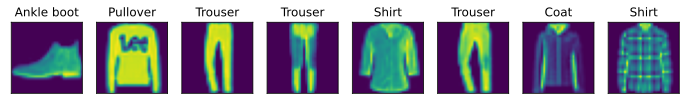

In [ ]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

## Ex 4.2

### Q1:

as we decrease the batch_size it is taking much more time to laod the data

In [ ]:
inst = FashionMNIST(batch_size=32, resize=(32, 32))

In [ ]:
time.time()

1670274649.2048228

In [ ]:
tic = time.time()
for X, y in inst.train_dataloader():
  continue
print(f"{time.time() - tic:.2f} sec")

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


12.62 sec


In [ ]:
inst = FashionMNIST(batch_size=16, resize=(32, 32))
tic = time.time()
for X, y in inst.train_dataloader():
  continue
print(f"{time.time() - tic:.2f} sec")

16.65 sec


In [ ]:
inst = FashionMNIST(batch_size=1, resize=(32, 32))
tic = time.time()
for X, y in inst.train_dataloader():
  continue
print(f"{time.time() - tic:.2f} sec")

145.24 sec


In [ ]:
%time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


# 4.3 The Base Clasification Model

In [11]:
import torch
from d2l import torch as d2l

In [ ]:
inst = FashionMNIST(resize=(32, 32))
data = inst.val_dataloader()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
*data[:-1]

SyntaxError: ignored

In [12]:
class Classifier(d2l.Module):
  def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
    self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [13]:
# still using SGD
@add_to_class(d2l.Module)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), lr=self.lr)

In [ ]:
a = torch.zeros(5, 6)
b = a.reshape(-1)
print(b.shape)

torch.Size([30])


In [ ]:
a = torch.zeros(5, 6, 7)
a.shape[-1]

7

In [ ]:
a = torch.arange(20).reshape(4, 5)
print(a)
print(a.argmax(axis=1))

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([4, 4, 4, 4])


In [14]:
# accuracy
@add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
  Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
  preds = Y_hat.argmax(axis=1).type(Y.dtype)
  compare = (preds == Y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

# 4.4 Softmax Regression Implementation from Scratch

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


In [15]:
import torch
from d2l import torch as d2l

In [16]:
import torch.nn as nn

In [ ]:
X = torch.arange(1, 7, 1, dtype=torch.float32).reshape(2, -1)

In [ ]:
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
X.sum(axis=0) # add the rows of X

tensor([5., 7., 9.])

In [ ]:
X.sum(axis=1, keepdims=True) # adds the columns

tensor([[ 6.],
        [15.]])

In [ ]:
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [ ]:
X.reshape(-1) # it unpacks the matrix row-wise

tensor([1., 2., 3., 4., 5., 6.])

In [ ]:
X.reshape(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [17]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(axis=1, keepdims=True)
  return X_exp / partition

In [ ]:
X = torch.randn(2, 5) # 2 examples into 5 categories
X_prob = softmax(X)
print(X_prob)

tensor([[0.1613, 0.0864, 0.0157, 0.1264, 0.6102],
        [0.0368, 0.2361, 0.2408, 0.2058, 0.2805]])


In [ ]:
print(X_prob.sum(axis=1))

tensor([1.0000, 1.0000])


In [ ]:
nn.Module??

This is a base class for all neural network modules

In [ ]:
d2l.nn_Module??

In [ ]:
d2l.Module?? # Module class is the base class for all the models to be implemented
# The init method stores the learnable parameters
# training_step method accepts a data batch and returns the loss value
# configure optimizers method returns the optimization method or a list of them, which will be used to update the learnable parameters

SyntaxError: ignored

In [ ]:
class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs), requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad=True)

  def forward(self, X):
    # O = XW + b
    o = torch.mm(X.reshape(-1, self.W.shape[0]), self.W) + self.b
    return softmax(o)

  def loss(self, y, y_hat):
    return cross_entropy(y_hat, y)

In [ ]:
y = torch.tensor([0, 2]) # this is the label for each examples : 1st example correspond to class 0, 2nd example belong to class 2
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])  # n_samples x n_classes
# y_hat[[0, 1], y]

In [ ]:
y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [ ]:
list(range(len(y)))

[0, 1]

In [ ]:
y_hat[0] # Gives the 0th row

tensor([0.1000, 0.3000, 0.6000])

In [ ]:
y_hat[list(range(len(y)))] # gives the 0th and 1st row of y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [ ]:
y_hat[[0, 1], [0, 2]] # (0, 0) and (1, 2) th element

tensor([0.1000, 0.5000])

In [ ]:
list(range(len(y_hat)))

[0, 1]

In [ ]:
y_hat[[0, 1], [0, 2]].mean()

tensor(0.3000)

In [18]:
def cross_entropy(y_hat, y):
  l = -torch.log(y_hat[list(range(len(y_hat))), y]).mean()
  return l

In [19]:
def accuracy(Y_hat, Y, averaged=True):
  Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
  preds = Y_hat.argmax(axis=1).type(Y.dtype)
  compare = (preds == Y.reshape(-1)).type(torch.float32)
  return compare.mean() if averaged else compare

In [20]:
class Trainer_my():
  def __init__(self, max_epochs):
    self.max_epochs = max_epochs
    self.train_loss = []
    self.val_loss = []
    self.val_acc = []

  def fit(self, model, data):

    optimizer = torch.optim.SGD([model.W, model.b], model.lr)

    for epoch in range(self.max_epochs):

      # Training loop:
      t_loss = torch.zeros(1, requires_grad=False)
      for X, y in data.train_dataloader():

        # forward_pass
        y_hat = model.forward(X)
        l = model.loss(y, y_hat)
        
        with torch.no_grad():
          t_loss += l
       
        # backward_pass
        l.backward()

        # update the params
        optimizer.step()

        # zero the grad
        optimizer.zero_grad()

      self.train_loss.append(t_loss.item())

      with torch.no_grad():
      # Validation_loop:
        t_loss = torch.zeros(1)
        t_acc = torch.zeros(1)
        for X, y in data.val_dataloader():
          y_hat = model.forward(X)
          t_loss += model.loss(y, y_hat)
          t_acc += accuracy(y_hat, y)

        self.val_loss.append(t_loss.item())
        self.val_acc.append(t_acc.item())

In [ ]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = Trainer_my(max_epochs=10)
trainer.fit(model, data)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Now our model as has been trained

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler

rcParams['figure.figsize'] = 12,6
rcParams['lines.linewidth'] = 2.5
rcParams['axes.prop_cycle'] = cycler(color = ['#424242'])
rcParams['xtick.labelsize'] = 'xx-large'
rcParams['ytick.labelsize'] = 'xx-large'

In [ ]:
trainer.train_loss / max(trainer.train_loss)

TypeError: ignored

In [ ]:
max(trainer.train_loss)

184.3553924560547

In [ ]:
max(trainer.val_loss)

26.234943389892578

In [ ]:
trainer.val_acc

[30.62109375,
 32.2578125,
 31.484375,
 33.07421875,
 32.9765625,
 33.17578125,
 33.234375,
 33.04296875,
 32.88671875,
 33.34375]

In [22]:
train_loss = [x/max(trainer.train_loss) for x in trainer.train_loss]
val_loss = [x/max(trainer.val_loss) for x in trainer.val_loss]
val_acc = [x / 100 for x in trainer.val_acc]


plt.plot(list(range(trainer.max_epochs)), train_loss, label="train_loss", color='blue')
plt.plot(list(range(trainer.max_epochs)), val_loss, label='val_loss', color='orange', linestyle='dashed')
plt.plot(list(range(trainer.max_epochs)), val_acc, label='val_acc', color='green', linestyle='dashed') 

plt.legend()
plt.grid()
plt.show()

NameError: ignored

In [ ]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

In [ ]:
y.shape

torch.Size([256])

In [ ]:
preds

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 0, 7, 7, 7,
        1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 6, 7, 2, 1,
        2, 6, 6, 2, 5, 6, 2, 2, 8, 2, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        6, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 4, 2, 1, 2, 5, 1, 0, 0, 0,
        1, 6, 1, 3, 2, 2, 6, 2, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 4, 7,
        4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 8, 7, 9, 9, 4, 4, 7, 1, 2,
        1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 4, 8, 5, 3, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2,
        5, 4, 9, 6, 2, 8, 6, 2, 6, 4, 9, 7, 4, 5, 5, 4])

In [ ]:
wrong = (preds.type(y.dtype) != y)
wrong

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True, False, False,
         True,  True, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False,  True, False, False, False, False, False,  True,
         True,  True, False,  True, False, False, False,  True, False, False,
        False, False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False,  True, 

In [ ]:
name = ['a', 'b', 'c', 'd', 'e']
roll_no = [1, 2, 3, 4]

m1 = zip(name, roll_no)
m2 = zip(roll_no, name)

print(f"m1 = {set(m1)}")
print(f"m2 = {set(m2)}")

m1 = {('d', 4), ('b', 2), ('c', 3), ('a', 1)}
m2 = {(3, 'c'), (1, 'a'), (4, 'd'), (2, 'b')}


In [ ]:
d2l.FashionMNIST.visualize??

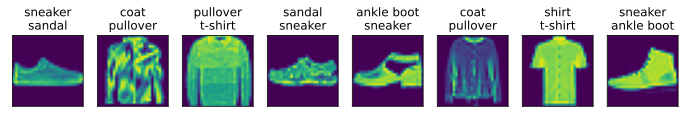

In [ ]:
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a + "\n" + b for a,b in zip(data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

## Ex 4.4

### Q1:

1 : doesn't work

2 : doesn't work

In [23]:
def softmax(X):
  X_exp = torch.exp(X)
  sum = X_exp.sum(axis=1, keepdims=True)
  return (X_exp / sum)

In [ ]:
a = torch.tensor([100., 200. ,50.], dtype=torch.float32, requires_grad=True).reshape(1, -1)
softmax(a)

tensor([[nan, nan, 0.]], grad_fn=<DivBackward0>)

In [ ]:
b = torch.tensor([-150, -200, -187], dtype=torch.float32).reshape(1, -1)
softmax(b)

tensor([[nan, nan, nan]])

In [24]:
def new_softmax(X): 
  sum1 = X.sum(axis=1, keepdims=True) 
  X = X / sum1
  X_exp = torch.exp(X)
  sum2 = X_exp.sum(axis=1, keepdims=True)
  return (X_exp / sum2)

In [ ]:
new_softmax(a)

tensor([[0.3127, 0.4162, 0.2711]], grad_fn=<DivBackward0>)

In [ ]:
new_softmax(b)

tensor([[0.3156, 0.3464, 0.3381]])

In [ ]:
a = torch.tensor([990, 10000, 0.01], dtype=torch.float32).reshape(1, -1)

new_softmax(a)

tensor([[0.2390, 0.5426, 0.2184]])

### Q2:

if y_hat for certain class is 0 then log of that will give us -inf

there is another problem with pd.get_dummies

if in a batch there is no instance of class 6 then there will be no column for class 6 in the hot encoded data

In [25]:
import pandas as pd

In [26]:
import numpy as np

In [ ]:
X.shape

torch.Size([39, 1, 28, 28])

In [ ]:
one_hot_encoded_data = pd.get_dummies(y.numpy())
one_hot_encoded_data.head()

,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1


In [ ]:
one_hot_encoded_data[0] = 0
one_hot_encoded_data.head() 

,2,3,4,5,6,7,8,9,1,0
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [ ]:
one_hot_encoded_data.head()

,2,3,4,5,6,7,8,9,1,0
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [ ]:
a = one_hot_encoded_data[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
a.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
one_hot_encoded_data.columns

Int64Index([2, 3, 4, 5, 6, 7, 8, 9, 1, 0], dtype='int64')

In [ ]:
y_numpy = a.to_numpy()

In [ ]:
y_numpy.shape

(39, 10)

In [ ]:
preds.shape

torch.Size([39])

In [ ]:
preds_enc = pd.get_dummies(preds.numpy())
preds_enc.head()

,0,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [ ]:
preds_enc[1] = 0
# preds_enc[9] = 0 
preds_enc.head()

,0,2,3,4,5,6,7,8,9,1
0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [ ]:
b = preds_enc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
b.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [ ]:
preds_numpy = b.to_numpy()
preds_numpy.shape

(39, 10)

In [ ]:
y = torch.from_numpy(y_numpy)
preds = torch.from_numpy(preds_numpy)
y.shape, preds.shape 

(torch.Size([39, 10]), torch.Size([39, 10]))

now we have the hot_encoded versions of both preds and y so now we can calculate the cross entropy

In [ ]:
a = torch.ones(5, 5)
b = torch.ones(5, 5)

torch.matmul(a, b)
print(a * b)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [27]:
def cross_entropy(y, y_hat):
  # y_hat : matrix of (n_samples * classes) 
  # y : 

  ans = (y * torch.log(y_hat)).sum(axis=1)
  # print(ans)
  return ans.sum()

In [ ]:
cross_entropy(y, preds)

tensor(nan)

In [ ]:
torch.log(torch.zeros(1)) # useless

tensor([-inf])

Will have to redo

In [ ]:
data = d2l.FashionMNIST(batch_size=40)

In [ ]:
X, y = next(iter(data.val_dataloader()))
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

X.shape = torch.Size([40, 1, 28, 28])
y.shape = torch.Size([40])


In [ ]:
y_hat = model.forward(X)
print(f"y_hat.shape = {y_hat.shape}")

y_hat.shape = torch.Size([40, 10])


In [ ]:
y_enc = pd.get_dummies(y.numpy())
y_enc.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_numpy = y_enc.to_numpy()
y = torch.from_numpy(y_numpy)
y.shape # this is the encoded version

torch.Size([40, 10])

In [ ]:
cross_entropy(y, y_hat)

tensor(-16.5953, grad_fn=<SumBackward0>)

### Q4:

in large vocab many words might have similar probability, so depending on the sentence we would have to make a decision

### Q5:

In [ ]:
a = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.01)

In [ ]:
a

SoftmaxRegressionScratch()

In [ ]:
SoftmaxRegressionScratch??

In [28]:
def cross_entropy(y_hat, y):

  return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

In [ ]:
def give_val_loss(lr):
  model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=lr)

  max_epochs=10
  optimizer = torch.optim.SGD([model.W, model.b], model.lr)

  #training loop:
  for epoch in range(max_epochs):
    for X, y in data.train_dataloader():

      # forward pass : y_hat and loss
      y_hat = model.forward(X)
      l = model.loss(y, y_hat)

      # backward pass : gradient
      l.backward()

      # update the params
      optimizer.step()

      # empty the grad
      optimizer.zero_grad()

  # After the training is done i just need the validation loss
  with torch.no_grad():
    val_loss = torch.zeros(1)
    for X, y in data.val_dataloader():
      y_hat = model.forward(X)
      val_loss += model.loss(y, y_hat)
  
  return val_loss.item()

In [ ]:
lr_list = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3]
data = d2l.FashionMNIST(batch_size=256)

val_loss_list = []
for lr in lr_list:
  t = give_val_loss(lr)
  val_loss_list.append(t)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


took 23.1 mintues to finish

In [ ]:
val_loss_list

[24.67364501953125,
 22.214550018310547,
 21.268463134765625,
 20.477718353271484,
 20.344980239868164,
 19.69390106201172,
 19.374948501586914,
 19.225393295288086,
 19.419525146484375,
 19.0858097076416,
 18.37587547302246,
 23.052000045776367]

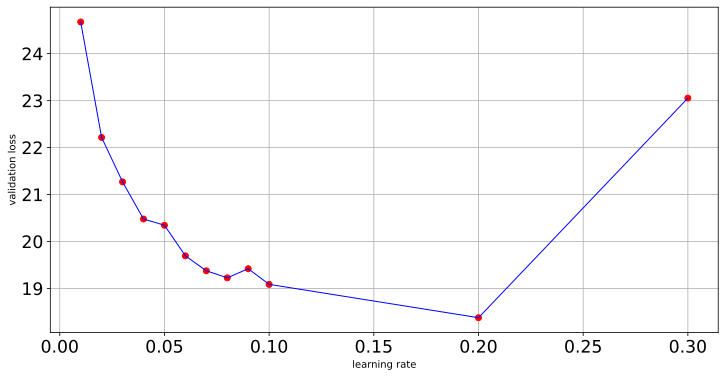

In [ ]:
plt.plot(lr_list, val_loss_list, 'ro')
plt.plot(lr_list, val_loss_list, 'b', linewidth=1)
plt.grid()
plt.xlabel("learning rate")
plt.ylabel('validation loss')
plt.show()

lowest loss at 0.09 and 0.2 learning rate

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


as we increase the batch_size both the validation_loss and the training_loss decrease and their difference is tending to zero

In [36]:
def give_diff_loss(batch_size):

  model = SoftmaxRegressionMod(num_inputs=784, num_outputs=10, lr=0.01)

  # give the difference between the train_loss and val_loss at the end of the training
  data = d2l.FashionMNIST(batch_size=batch_size)

  max_epochs=10
  optimizer = torch.optim.SGD([model.W, model.b], model.lr)

  for epoch in range(max_epochs):

    # training loop
    train_loss = torch.zeros(1)
    for X, y in data.train_dataloader():

      # forward pass : y_hat and loss
      y_hat = model.forward(X)
      l = model.loss(y, y_hat)
      train_loss += l.detach()

      # backward pass : gradient
      l.backward()

      # update the params
      optimizer.step()

      # zero the grad
      optimizer.zero_grad()
  
  # validation loop :
  with torch.no_grad():
    val_loss = torch.zeros(1)
    for X, y in data.val_dataloader():
      y_hat = model.forward(X)
      val_loss += model.loss(y, y_hat)

    print(f"val_loss = {val_loss.item():.4f}, train_loss = {train_loss.item():.4f}")
    return (val_loss.item() - train_loss.item())

In [29]:
def new_softmax(X): 
  sum1 = X.sum(axis=1, keepdims=True) 
  X = X / sum1
  X_exp = torch.exp(X)
  sum2 = X_exp.sum(axis=1, keepdims=True)
  return (X_exp / sum2)

In [30]:
class SoftmaxRegressionMod(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs), requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad=True)

  def forward(self, X):
    # O = XW + b
    o = torch.mm(X.reshape(-1, self.W.shape[0]), self.W) + self.b
    return new_softmax(o)

  def loss(self, y, y_hat):
    return cross_entropy(y_hat, y)

In [37]:
bs_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096] # len(bs_list) = 11
diff_list = []

for i, bs in enumerate(bs_list):
  if (i > 8) :
    continue 
  diff_list.append(give_diff_loss(bs))
  print(f"i = {i}, diff_list[i] = {diff_list[i]}")

val_loss = 11500.2852, train_loss = 69004.1172
i = 0, diff_list[i] = -57503.83203125
val_loss = 5734.5132, train_loss = 34412.8750
i = 1, diff_list[i] = -28678.36181640625
val_loss = nan, train_loss = nan
i = 2, diff_list[i] = nan
val_loss = 1437.7999, train_loss = 8627.1523
i = 3, diff_list[i] = -7189.3524169921875
val_loss = 715.3057, train_loss = 4286.8955
i = 4, diff_list[i] = -3571.58984375
val_loss = 358.1099, train_loss = 2140.1262
i = 5, diff_list[i] = -1782.016357421875
val_loss = nan, train_loss = nan
i = 6, diff_list[i] = nan
val_loss = nan, train_loss = nan
i = 7, diff_list[i] = nan


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8fd0c53790>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8fd0c53790>
assert self._parent_pid == os.getpid(), 'can only test a child process'Traceback (most recent call last):

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
AssertionError    : can only test a child processself._shutdown_workers()

  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():Exception ignored in: 


val_loss = nan, train_loss = nan
i = 8, diff_list[i] = nan


train_loss > val_loss 

differnece between them is decreasing

In [ ]:
diff_list

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

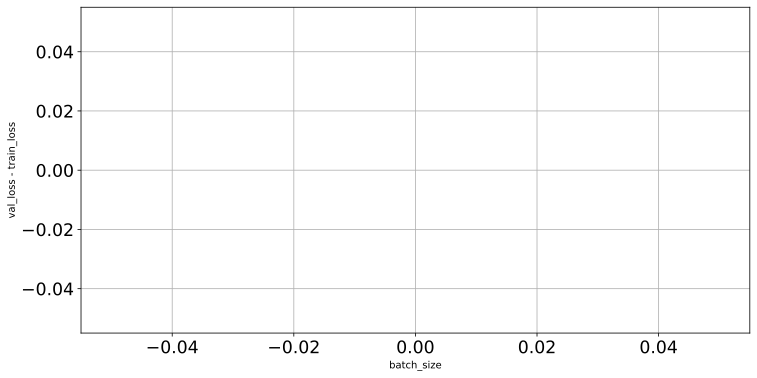

In [ ]:
plt.plot(bs_list, diff_list, 'ro')
plt.plot(bs_list, diff_list, 'b', linewidth=1)
plt.grid()
plt.xlabel("batch_size")
plt.ylabel('val_loss - train_loss')
plt.show()